In [1]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

# Define the directory containing the dataset
train_dir = "/content/drive/MyDrive/Faulty_solar_panel"

# Create ImageDataGenerator for data augmentation and splitting
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of data for validation
)

# Load and prepare training data
train_data = datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',  # For binary classification
    subset='training'  # Specify training set
)

Found 601 images belonging to 2 classes.


In [3]:


# Load and prepare validation data
validation_data = datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',  # For binary classification
    subset='validation'  # Specify validation set
)

# Create CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary output
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_data,
    epochs=20,
    validation_data=validation_data
)

# Save the model (optional)
model.save('/content/drive/MyDrive/faulty_solar_panel_model.h5')


Found 149 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 159s 7s/step - accuracy: 0.6818 - loss: 0.8886 - val_accuracy: 0.7718 - val_loss: 0.4962
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 174s 6s/step - accuracy: 0.7816 - loss: 0.4930 - val_accuracy: 0.7584 - val_loss: 0.5347
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 133s 6s/step - accuracy: 0.7947 - loss: 0.5049 - val_accuracy: 0.7517 - val_loss: 0.5181
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 125s 6s/step - accuracy: 0.8305 - loss: 0.3687 - val_accuracy: 0.7517 - val_loss: 0.5547
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 136s 6s/step - accuracy: 0.8279 - loss: 0.4828 - val_accuracy: 0.7517 - val_loss: 0.4925
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 118s 6s/step - accuracy: 0.8052 - loss: 0.4108 - val_accuracy: 0.7114 - val_loss: 0.5084
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 152s 6s/step - accuracy: 0.8336 - loss: 0.4186 - val_accuracy: 0.6577 - val_loss: 0.5533
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 119s 6s/step - accuracy: 0.8523 - loss: 0.3673 - val_accuracy: 0.6376 - val_loss: 0.

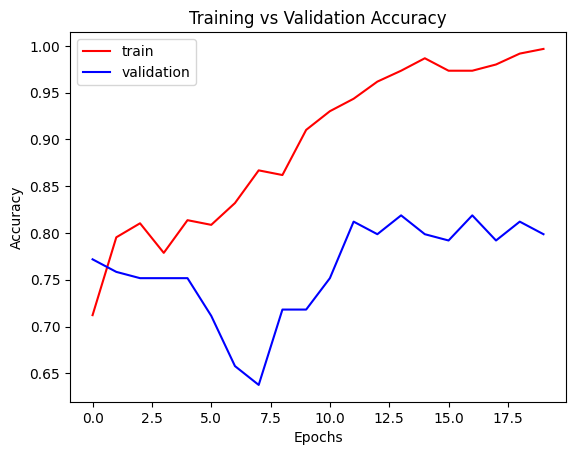

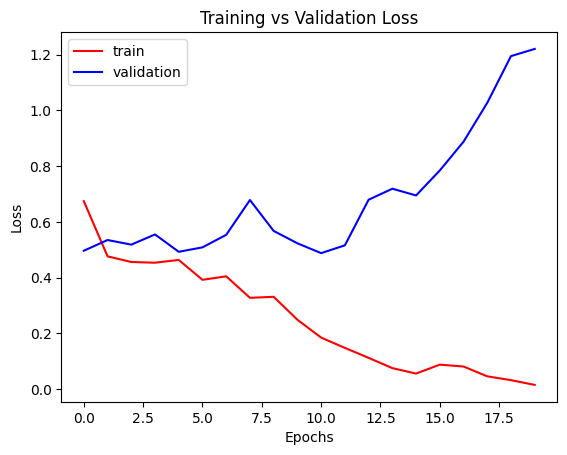

Found 149 images belonging to 2 classes.


5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.8053 - loss: 1.1055
Test Loss: 1.2205
Test Accuracy: 0.7987


In [7]:

# Plotting the training history for accuracy and loss
# This is useful to visualize how well the model is performing during training and validation
plt.plot(history.history['accuracy'], color='red', label='train')  # Plot training accuracy
plt.plot(history.history['val_accuracy'], color='blue', label='validation')  # Plot validation accuracy
plt.title('Training vs Validation Accuracy')  # Title for the accuracy plot
plt.xlabel('Epochs')  # X-axis label (Epochs)
plt.ylabel('Accuracy')  # Y-axis label (Accuracy)
plt.legend()  # Show legend
plt.show()  # Display the plot

plt.plot(history.history['loss'], color='red', label='train')  # Plot training loss
plt.plot(history.history['val_loss'], color='blue', label='validation')  # Plot validation loss
plt.title('Training vs Validation Loss')  # Title for the loss plot
plt.xlabel('Epochs')  # X-axis label (Epochs)
plt.ylabel('Loss')  # Y-axis label (Loss)
plt.legend()  # Show legend
plt.show()  # Display the plot

# Now you need to test the model on the same images used for validation (treated as test)
# Define test data generator (same as validation generator)
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Apply same validation split for testing

# Load the "test" data from the same directory, using the validation split
test_data = test_datagen.flow_from_directory(
    train_dir,  # Use the same train directory
    target_size=(256, 256),  # Resize all images to 256x256
    batch_size=32,  # Use a batch size of 32
    class_mode='binary',  # For binary classification
    subset='validation'  # Treat the validation subset as the test set
)

# Load the trained model
model = load_model('/content/drive/MyDrive/faulty_solar_panel_model.h5')  # Load the trained model

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_data)  # Evaluate model on the test data

# Print test results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

In [10]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model

# Define the test data generator (same as for validation)
test_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Rescale images and use the validation split

# Load the "test" data from the same directory as the train data, using the validation subset
test_data = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Faulty_solar_panel',  # Use the same directory for both train and test
    target_size=(256, 256),  # Resize images to 256x256
    batch_size=32,  # Use a batch size of 32
    class_mode='binary',  # Binary classification (clean vs. defective)
    subset='validation'  # Use the validation subset as the test set
)

# Load the trained model (ensure this path is correct)
model = load_model('/content/drive/MyDrive/faulty_solar_panel_model.h5')

# Predict on the test data
predictions = model.predict(test_data)

# Assuming the true labels are in test_data.classes, and predictions are binary (0 or 1)
true_labels = test_data.classes  # Ground truth labels
predicted_labels = (predictions > 0.5).astype(int)  # Convert predicted probabilities to binary labels

# Calculate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Print the classification report (includes precision, recall, F1-score, etc.)
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))


Found 149 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step
Confusion Matrix:
[[ 8 30]
 [32 79]]
Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.21      0.21        38
           1       0.72      0.71      0.72       111

    accuracy                           0.58       149
   macro avg       0.46      0.46      0.46       149
weighted avg       0.59      0.58      0.59       149



In [ ]:
#Reducing overfitting by fine tunning

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Set up ImageDataGenerator with validation split (since you have only one folder)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% for validation
)

# Load and prepare data from the directory, split by 'training' and 'validation'
train_data = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/Faulty_solar_panel",  # Path to your main folder
    target_size=(256, 256),  # Resize all images to 256x256
    batch_size=32,
    class_mode='binary',  # Binary classification
    subset='training'  # For training set
)

# Validation data (using the same directory and validation split)
validation_data = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/Faulty_solar_panel",  # Path to your main folder
    target_size=(256, 256),
    batch_size=32,
    class_mode='binary',  # Binary classification
    subset='validation'  # For validation set
)

# Create CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))  # 32 filters
model.add(BatchNormalization())  # Added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())  # Added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())  # Added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())  # Flatten to feed into dense layers

model.add(Dense(128, activation='relu'))  # Feature reduction
model.add(Dropout(0.3))  # Dropout added to reduce overfitting
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))  # Dropout added to reduce overfitting
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_data, epochs=20, validation_data=validation_data)

# can also plot training/validation accuracy and loss if needed
import matplotlib.pyplot as plt

# Plot training vs validation accuracy
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training vs validation loss
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_data)  # Evaluate model on the test data

# Print test results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

4/5 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step
Confusion Matrix:
[[ 36   2]
 [111   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.95      0.39        38
           1       0.00      0.00      0.00       111

    accuracy                           0.24       149
   macro avg       0.12      0.47      0.19       149
weighted avg       0.06      0.24      0.10       149



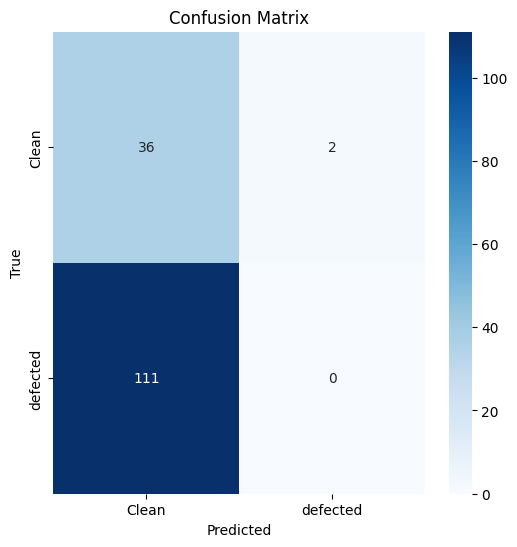

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Get predictions on validation data
predictions = model.predict(validation_data)

# Extract ground truth labels (true labels)
true_labels = validation_data.classes

# Predicted labels: apply threshold to predictions (0.5 for binary classification)
predicted_labels = (predictions > 0.5).astype(int)

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

# Optional: Plot the confusion matrix
import seaborn as sns
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_data.class_indices.keys(), yticklabels=validation_data.class_indices.keys())
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
#now pretrained model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up ImageDataGenerator with validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% for validation split
)

# Load and prepare data from the directory, split by 'training' and 'validation'
train_data = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/Faulty_solar_panel",  # Path to your main folder
    target_size=(256, 256),  # Resize all images to 256x256
    batch_size=32,
    class_mode='binary',  # Binary classification
    subset='training'  # Use the 'training' subset (80% of data)
)

# Validation data (using the same directory and validation split)
validation_data = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/Faulty_solar_panel",  # Path to your main folder
    target_size=(256, 256),  # Resize all images to 256x256
    batch_size=32,
    class_mode='binary',  # Binary classification
    subset='validation'  # Use the 'validation' subset (20% of data)
)

# Create the model with ResNet50 as base
resnet_model = Sequential()

# Load the pre-trained ResNet50 model without the top layers (to use it for feature extraction)
pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,  # Exclude the original fully connected layers
    input_shape=(256, 256, 3),  # Set the input shape to match your image dimensions
    pooling='max',  # Use global max pooling
    weights='imagenet'  # Load pre-trained ImageNet weights
)

# Freeze all layers in the pre-trained model
for layer in pretrained_model.layers:
    layer.trainable = False  # Keep the pre-trained weights frozen

# Add the pre-trained ResNet50 model and custom layers
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())  # Flatten the output for fully connected layers
resnet_model.add(Dense(512, activation='relu'))  # Dense layer with 512 units
resnet_model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
resnet_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on your dataset
history = resnet_model.fit(train_data, epochs=20, validation_data=validation_data)

# Optionally, plot the training vs validation accuracy and loss (if needed)
import matplotlib.pyplot as plt

# Plot training vs validation accuracy
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training vs validation loss
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Found 601 images belonging to 2 classes.
Found 149 images belonging to 2 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 225s 11s/step - accuracy: 0.6236 - loss: 4.1993 - val_accuracy: 0.6913 - val_loss: 2.2388
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 256s 11s/step - accuracy: 0.7468 - loss: 1.2107 - val_accuracy: 0.6644 - val_loss: 0.8251
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 210s 11s/step - accuracy: 0.6605 - loss: 0.6812 - val_accuracy: 0.7315 - val_loss: 0.6917
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 211s 11s/step - accuracy: 0.8214 - loss: 0.4679 - val_accuracy: 0.7919 - val_loss: 0.5515
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 262s 11s/step - accuracy: 0.8193 - loss: 0.4042 - val_accuracy: 0.7450 - val_loss: 0.5049
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 209s 11s/step - accuracy: 0.8232 - loss: 0.4032 - val_accuracy: 0.7517 - val_loss: 0.5939
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 264s 11s/step - accuracy: 0.8404 - loss: 0.3732 - val_accuracy: 0.7584 - val_loss: 0.5087
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 260s 11s/step - accuracy: 0.8533 - loss: 0.3412 - val_accuracy: 0.7785 - val_

In [ ]:
# Generate predictions on validation data
predictions = resnet_model.predict(validation_data)

from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Get the true labels from the validation data
true_labels = validation_data.classes

# Convert predicted probabilities to binary labels
predicted_labels = (predictions > 0.5).astype(int).flatten()  # Flatten to match the shape of true_labels

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=list(validation_data.class_indices.keys())))

# Visualize confusion matrix (optional)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=validation_data.class_indices.keys(), yticklabels=validation_data.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
